# eigen vector
共分散行列と、固有値、固有ベクトルの関係。
# ライブラリのインポート

In [1]:
%matplotlib inline
import numpy as np
import math, random
import matplotlib.pyplot as plt

# サンプルの生成

In [2]:
pos = []         #サンプルの位置
sigma_x = 1.0    #xの標準偏差の設定
sigma_y = 0.5    #yの標準偏差の設定
num = 500        #サンプルの数

#設定した標準偏差を元にサンプルを生成
for i in range(num):
    pos.append(np.array([random.gauss(0, sigma_x), random.gauss(0, sigma_y)]))
    
#サンプルの描画関数
def draw(pos):
    fig = plt.figure(i, figsize=(8,8))
    sp = fig.add_subplot(111,aspect='equal')
    sp.set_xlim(-4.0,4.0)
    sp.set_ylim(-4.0,4.0)
    
    xs = [e[0] for e in pos]
    ys = [e[1] for e in pos]
    
    plt.scatter(xs,ys,s=30,marker="o",label="landmarks",alpha=0.3,color="skyblue")

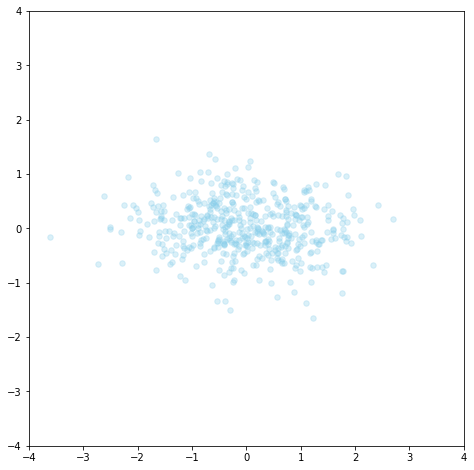

In [3]:
draw(pos)

# 平均値の算出

In [4]:
mean_x = 0
mean_y = 0

for p in pos:
    mean_x += p[0] / num
    mean_y += p[1] / num
    
print("mean x =\n", mean_x, "\nmean y =\n", mean_y)

mean x =
 -0.011988315949 
mean y =
 -0.00722422657548


# 分散共分散行列の算出

In [5]:
v_x = 0
v_y = 0
sigma_xy = 0

for p in pos:
    v_x += (mean_x - p[0]) ** 2 / num
    v_y += (mean_y - p[1]) ** 2 / num
    sigma_xy += (mean_x - p[0]) * (mean_y - p[1]) / num
    
cov = np.array([[v_x, sigma_xy],
                [sigma_xy, v_y]])

print("cov =\n",cov)

cov =
 [[ 1.10599591 -0.04019545]
 [-0.04019545  0.26307484]]


# 固有値、固有ベクトルの算出

In [6]:
eigen = np.linalg.eig(cov)

eigen_val = eigen[0]

eigen_vec = eigen[1]

print("eigen value =\n",eigen_val,"\neigen vectors =\n",eigen_vec)

eigen value =
 [ 1.10790833  0.26116243] 
eigen vectors =
 [[ 0.99887009  0.0475242 ]
 [-0.0475242   0.99887009]]


In [7]:
eigen_v = eigen[1:2][0]

v1 = math.sqrt(eigen_val[0]) * eigen_vec[0:2,0:1]
v2 = math.sqrt(eigen_val[1]) * eigen_vec[0:2,1:2]

print("vector_1 =\n", v1)
print("vector_2 =\n", v2)

vector_1 =
 [[ 1.05138293]
 [-0.05002266]]
vector_2 =
 [[ 0.02428679]
 [ 0.5104631 ]]


# 固有ベクトルの描画

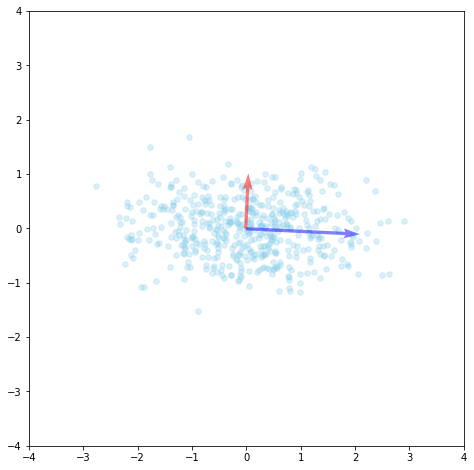

In [8]:
draw(pos)
v1_x, v1_y = v1 * 2
v2_x, v2_y = v2 * 2

plt.quiver(mean_x,mean_y,v1_x,v1_y,angles='xy',scale_units='xy',scale=1,color="blue",alpha=0.5)
plt.quiver(mean_x,mean_y,v2_x,v2_y,angles='xy',scale_units='xy',scale=1,color="red",alpha=0.5)

# サンプルの回転、移動

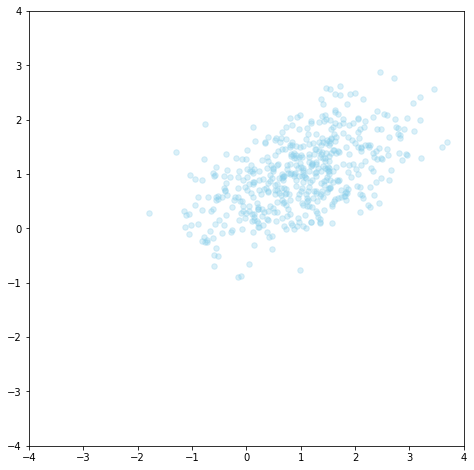

In [9]:
t = math.pi / 6
c = math.cos(t)
s = math.sin(t)

rot = np.array([[c, -s],
                [s, c]])

for i in range(len(pos)):
    pos[i] = rot.dot(pos[i])
    pos[i] += np.array([1,1])
    
draw(pos)

# 平均値、分散共分散行列の算出

In [10]:
mean_x = 0
mean_y = 0

for p in pos:
    mean_x += p[0] / num
    mean_y += p[1] / num
    
print("mean x =\n", mean_x, "\nmean y =\n", mean_y)

v_x = 0
v_y = 0
sigma_xy = 0

for p in pos:
    v_x += (mean_x - p[0]) ** 2 / num
    v_y += (mean_y - p[1]) ** 2 / num
    sigma_xy += (mean_x - p[0]) * (mean_y - p[1]) / num
    
cov = np.array([[v_x, sigma_xy],
                [sigma_xy, v_y]])

print("cov =\n",cov)

mean x =
 0.993229927127 
mean y =
 0.987749478288
cov =
 [[ 0.93007593  0.3448978 ]
 [ 0.3448978   0.43899483]]


# 固有値、固有ベクトルの算出

In [11]:
eigen = np.linalg.eig(cov)

eigen_val = eigen[0]

eigen_vec = eigen[1]

print("eigen value =\n",eigen_val,"\neigen vectors =\n",eigen_vec)

eigen value =
 [ 1.10790833  0.26116243] 
eigen vectors =
 [[ 0.88880897 -0.45827788]
 [ 0.45827788  0.88880897]]


In [12]:
eigen_v = eigen[1:2][0]

v1 = math.sqrt(eigen_val[0]) * eigen_vec[0:2,0:1]
v2 = math.sqrt(eigen_val[1]) * eigen_vec[0:2,1:2]

print("vector_1 =\n", v1)
print("vector_2 =\n", v2)

vector_1 =
 [[ 0.93553565]
 [ 0.48237057]]
vector_2 =
 [[-0.23419857]
 [ 0.45421741]]


# 固有ベクトルの描画

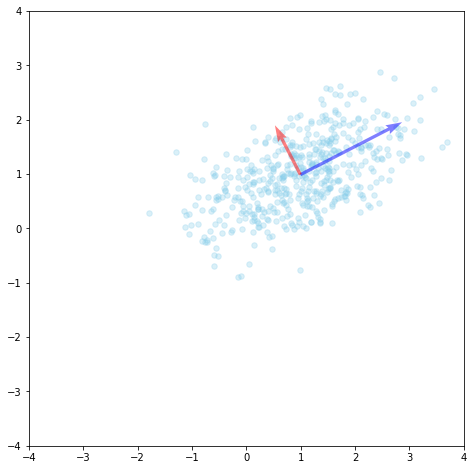

In [13]:
draw(pos)
v1_x, v1_y = v1 * 2
v2_x, v2_y = v2 * 2

plt.quiver(mean_x,mean_y,v1_x,v1_y,angles='xy',scale_units='xy',scale=1,color="blue",alpha=0.5)
plt.quiver(mean_x,mean_y,v2_x,v2_y,angles='xy',scale_units='xy',scale=1,color="red",alpha=0.5)